# Project：視覺化帕默群島企鵝數據

## 分析目標

此數據分析報告的目的是對帕默群島上企鵝樣本的相關變數進行視覺化，從而探索和分析種類、性別、所在島嶼等因素，與企鵝的身體屬性，包括體重、喙峰長度和深度、鰭的長度之間的關係。

## 簡介

原始資料`Penguins.csv`包含334個收集自南極洲帕爾默群島的3個島嶼上的企鵝樣本，以及企鵝相關屬性數據，包括種類名稱、所在島嶼、喙峰長度、喙峰深度、鰭長度、體重及性別。

`Penguins.csv`每列的含義如下：
- species：企鵝的種類  
- island：企鵝所在島嶼  
- culmen_length_mm：企鵝喙峰的長度（單位為毫米）  
- culmen_depth_mm：企鵝喙峰的深度（單位為毫米）  
- flipper_length_mm：企鵝鰭的長度（單位為毫米）  
- body_mass_g：企鵝體重（單位為克）  
- sex：企鵝性別  

## 讀取資料

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv('./penguins.csv')
original_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## 評估和清理資料

In [3]:
cleaned_data = original_data.copy()

### 資料整齊度
- 符合每行是一個變量，每列是一個觀察值，每個單元格是一個值

### 資料乾淨度
- 處理缺失數據
- 處理重複數據
- 處理不一致數據
- 處理無效或錯誤數據

In [4]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


共344筆資料，在`culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g`、`sex`有資料缺失。

在資料類型上，已知在`species`、`island`、`sex`都是分類數據，轉成`Category`。

In [5]:
cleaned_data['species'] = cleaned_data['species'].astype('category')
cleaned_data['island'] = cleaned_data['island'].astype('category')
cleaned_data['sex'] = cleaned_data['sex'].astype('category')
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            344 non-null    category
 1   island             344 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 12.3 KB


#### 處理缺失數據

In [ ]:
cleaned_data.query('culmen_length_mm.isnull()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


看起來在`culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g`、`sex`的資料缺失值都在同一筆，將其刪除。

In [ ]:
cleaned_data = cleaned_data.dropna(subset=['culmen_length_mm'])
# cleaned_data.drop(3, inplace=True)
# cleaned_data.drop(339, inplace=True)
cleaned_data['culmen_length_mm'].isnull().sum()

0

In [9]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            342 non-null    category
 1   island             342 non-null    category
 2   culmen_length_mm   342 non-null    float64 
 3   culmen_depth_mm    342 non-null    float64 
 4   flipper_length_mm  342 non-null    float64 
 5   body_mass_g        342 non-null    float64 
 6   sex                334 non-null    category
dtypes: category(3), float64(4)
memory usage: 14.7 KB


In [10]:
cleaned_data.query('sex.isna()')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


缺失`sex`變數資料不影響我們的分析目的，另外Pandas及Matplotlib、Seaborn會自動忽略缺失值，暫先保留，不影響分析結果。

#### 處理重複數據

In [11]:
cleaned_data.duplicated().sum()

0

#### 處理不一致數據

不一致數量可能會出現在所有分類`category`變量中，檢查是否存在不同值指代同一目標的情況。

In [14]:
print(cleaned_data['species'].value_counts())
print(cleaned_data['species'].value_counts().sum())

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64
342


In [16]:
print(cleaned_data['island'].value_counts())
print(cleaned_data['island'].value_counts().sum())

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64
342


In [15]:
print(cleaned_data['sex'].value_counts())
print(cleaned_data['sex'].value_counts().sum())

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64
334


`species`、`island`無不一致數據，但在`sex`裡存在一個英文句號的無效數據，應替換成NaN空值。

In [19]:
cleaned_data['sex'] = cleaned_data['sex'].replace('.', np.nan)
cleaned_data['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

#### 處理無效及或錯誤數據

過DataFrame的`describe`方法，對數值統計信息進行了解。

In [20]:
cleaned_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


從以上統計值來看，`cleaned_data`不存在脫離現實意義的數值。

## 整理資料

In [21]:
cleaned_data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## 數據探索

In [22]:
sns.set_palette('pastel')

#### 企鵝種類比例

([<matplotlib.patches.Wedge at 0x164259910>,
 [Text(0.2009557745501046, 1.0814882230865799, 'Adelie'),
  Text(-0.7954731951657139, -0.7597515355514921, 'Gentoo'),
  Text(0.8922884576047859, -0.6432894437384095, 'Chinstrap')],
 [Text(0.1096122406636934, 0.5899026671381343, '44%'),
  Text(-0.43389447009038934, -0.41440992848263203, '36%'),
  Text(0.4867027950571559, -0.3508851511300415, '20%')])

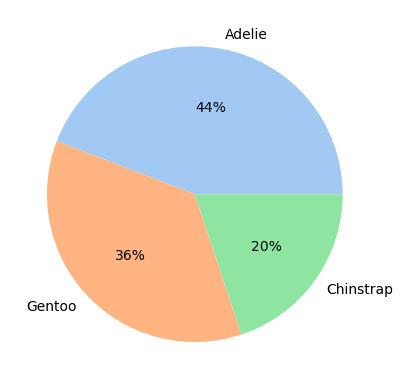

In [26]:
species_count = cleaned_data['species'].value_counts()
plt.pie(species_count, autopct='%.0f%%', labels=species_count.index)

從上圖可知`Adelie`這個種類的企鵝佔比最多，其次是`Gentoo`,最後是`Chinstrap`佔比最小。

#### 企鵝所在島嶼比例

([<matplotlib.patches.Wedge at 0x167bde490>,
 [Text(0.04040900576302639, 1.099257527721891, 'Biscoe'),
  Text(-0.532406541905731, -0.9625711787374382, 'Dream'),
  Text(0.9814796665594582, -0.4966866860812105, 'Torgersen')],
 [Text(0.022041275870741665, 0.5995950151210313, '49%'),
  Text(-0.29040356831221686, -0.5250388247658754, '36%'),
  Text(0.535352545396068, -0.2709200105897512, '15%')])

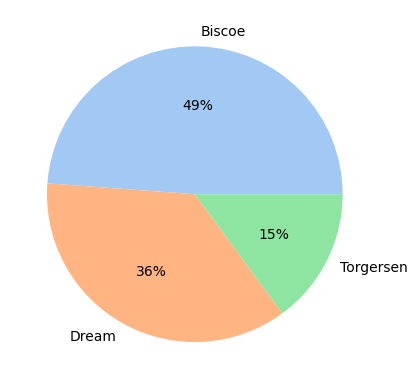

In [30]:
island_count = cleaned_data['island'].value_counts()
plt.pie(island_count, autopct='%.0f%%', labels=island_count.index)

有接近一半的企鵝樣本是來自`Biscoe`島嶼，其次是`Dream`，佔比最小是`Torgersen`

#### 企鵝性別比例

([<matplotlib.patches.Wedge at 0x167b75b50>,
 [Text(-0.015565921257439953, 1.09988985907472, 'MALE'),
  Text(0.01556592125743982, -1.09988985907472, 'FEMALE')],
 [Text(-0.008490502504058155, 0.5999399231316653, '50%'),
  Text(0.008490502504058082, -0.5999399231316653, '50%')])

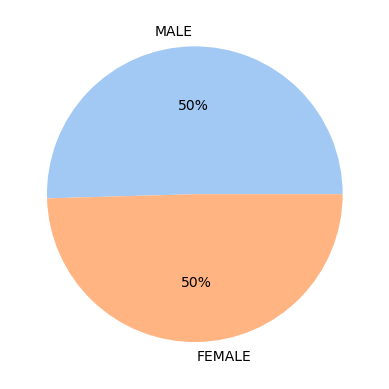

In [29]:
sex_count = cleaned_data['sex'].value_counts()
plt.pie(sex_count, autopct='%.0f%%', labels=sex_count.index)

企鵝M/F性別佔比持平，符合隨機抽樣。

#### 不同島嶼的企鵝種類數量

/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


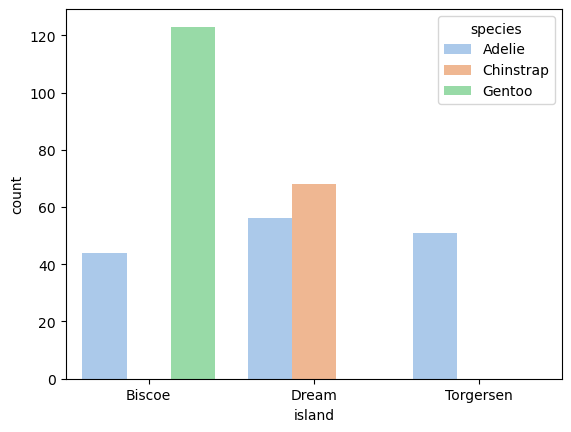

In [31]:
sns.countplot(cleaned_data, x='island', hue='species')
plt.show()

從上圖可知，`Adelie`種類的企鵝在三個島嶼街存在，而`Chinstrap`只在`Dream`島上才有，`Gentoo`只在`Biscoe`島上才有。

#### 不同島嶼的企鵝性別數量

/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


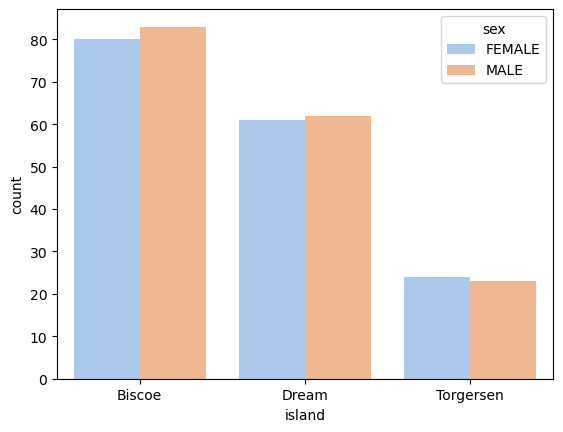

In [32]:
sns.countplot(cleaned_data, x='island', hue='sex')
plt.show()

/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

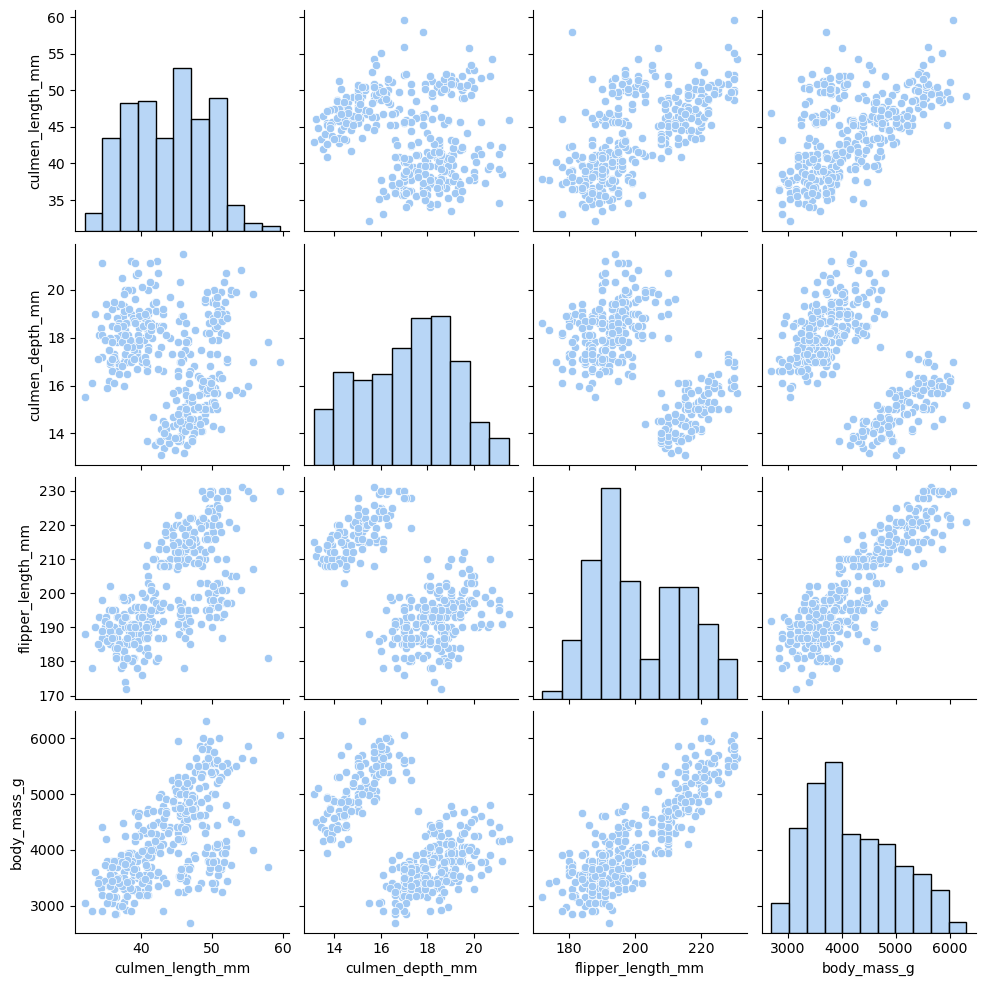

In [33]:
sns.pairplot(cleaned_data)
plt.show()

#### 根據種類查看數值之間的相關關係

/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

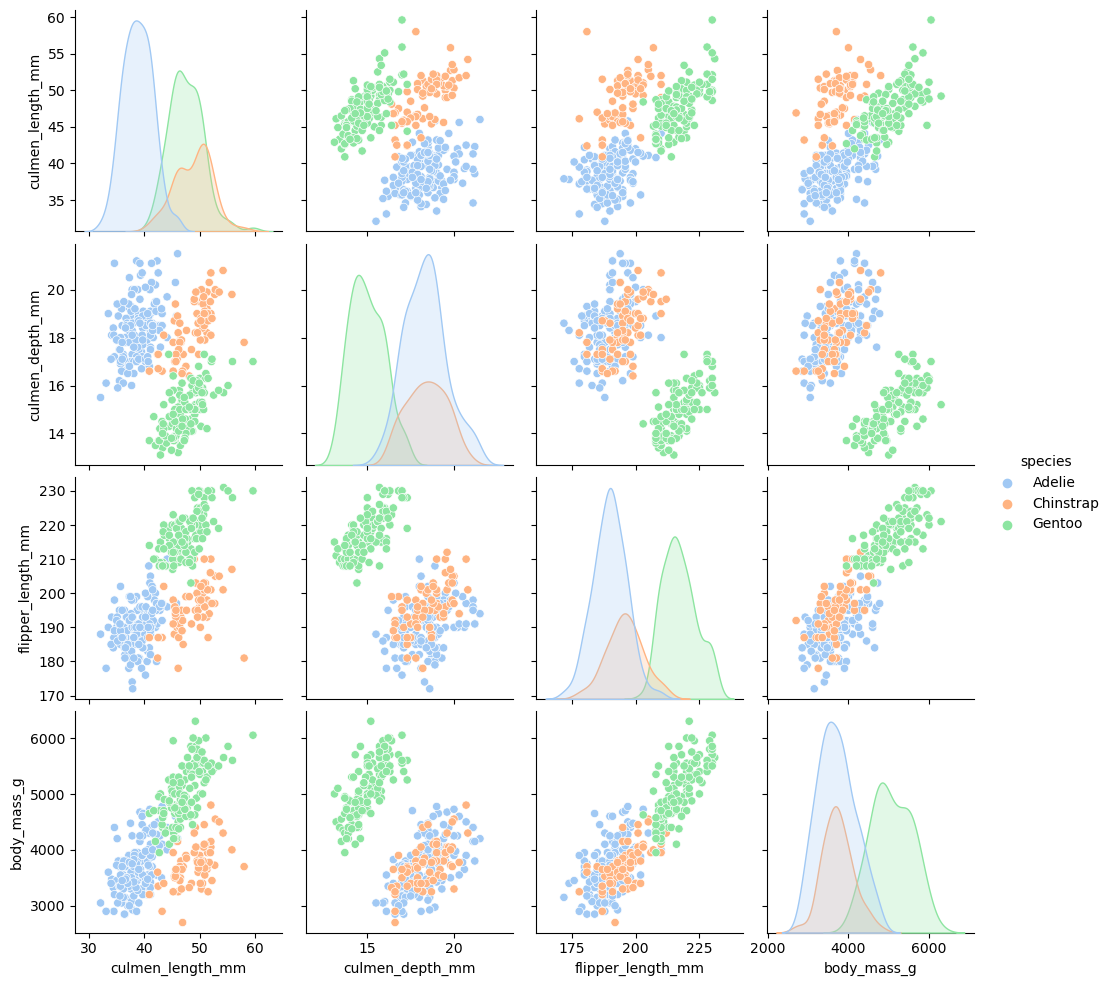

In [34]:
sns.pairplot(cleaned_data, hue='species')
plt.show()

同一種類的企鵝在散點圖會聚在一起，說明同一種類的企鵝在`culmen_length_mm`、`culmen_depth_mm`、`flipper_length_mm`、`body_mass_g`間的關係上存在相似性，這些發現有利於我們根據這些數值推測企鵝種類，也可根據企鵝種類來推測其體重或鰭長等。

/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

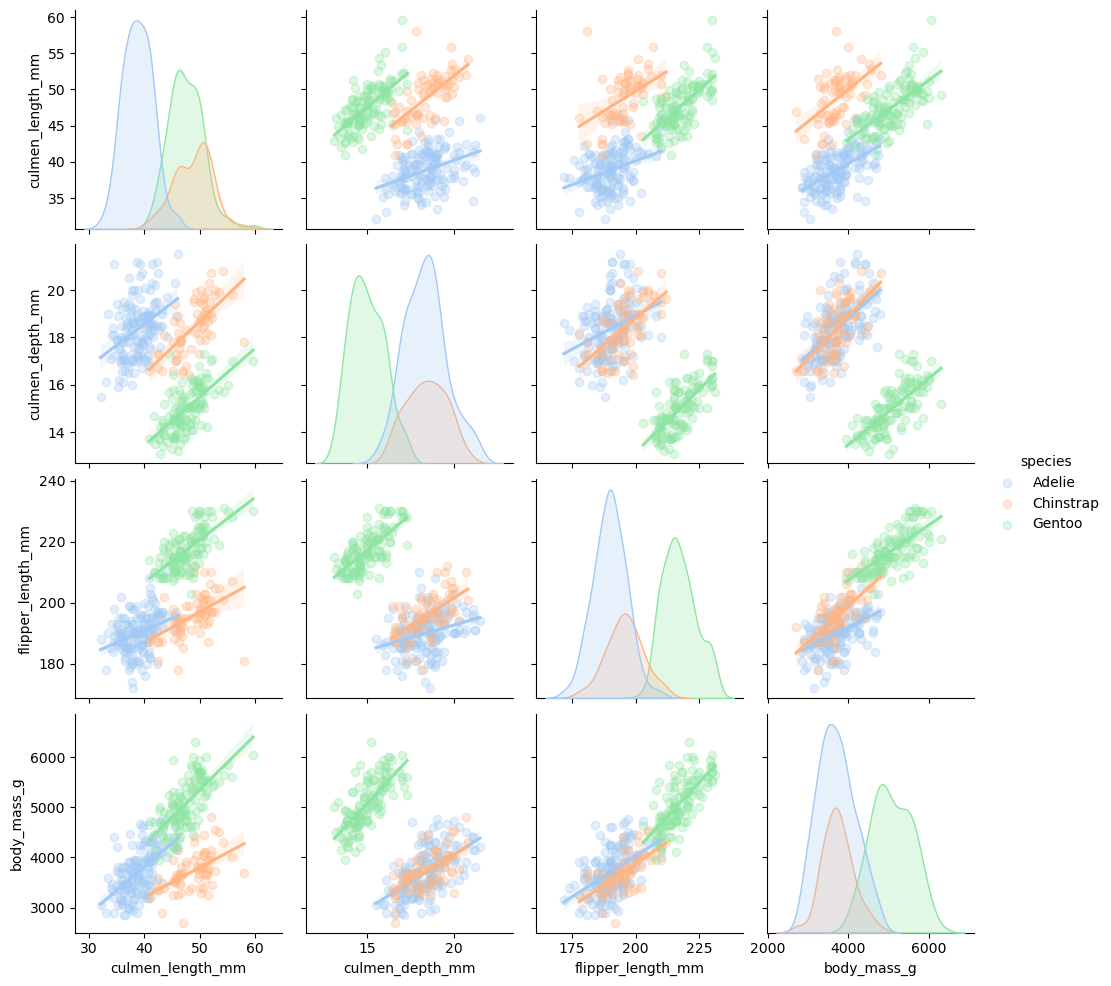

In [36]:
sns.pairplot(cleaned_data, hue='species', kind='reg', plot_kws={'scatter_kws': {'alpha': 0.3}})
plt.show()

/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


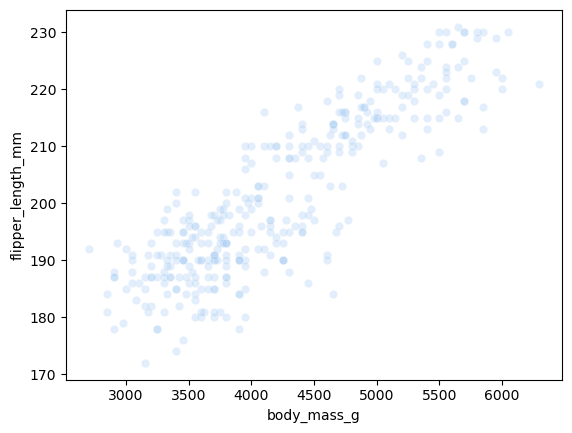

In [37]:
sns.scatterplot(cleaned_data, x='body_mass_g', y='flipper_length_mm', alpha=0.3)
plt.show()

散點圖結合線性回歸，同類企鵝的屬性數據間呈線性正比，即嘴峰越長，嘴峰越深，鰭越長，體重越重，反之亦然。

從密度圖的分佈來看，可以得到以下關於樣本的發現：  
- Chinstrap 和 Gentoo 的嘴峰長度範圍較為接近，而 Adelie 的嘴峰長度較短。  
- Adelie 和 Chinstrap 的嘴峰深度範圍較為接近，而 Gentoo 的嘴峰深度較短。  
- Adelie 的鰭長度最短，Chinstrap 居中，而 Gentoo 的鰭長度最長。  
- Adelie 和 Chinstrap 的體重範圍較為接近，而 Gentoo 的體重較大。  

但不同種類的屬性數值是否存在統計顯著性差異，仍然需要進行假設檢驗後才能得出結論。

### 根據性別查看數值間的關係

/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/revatsai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

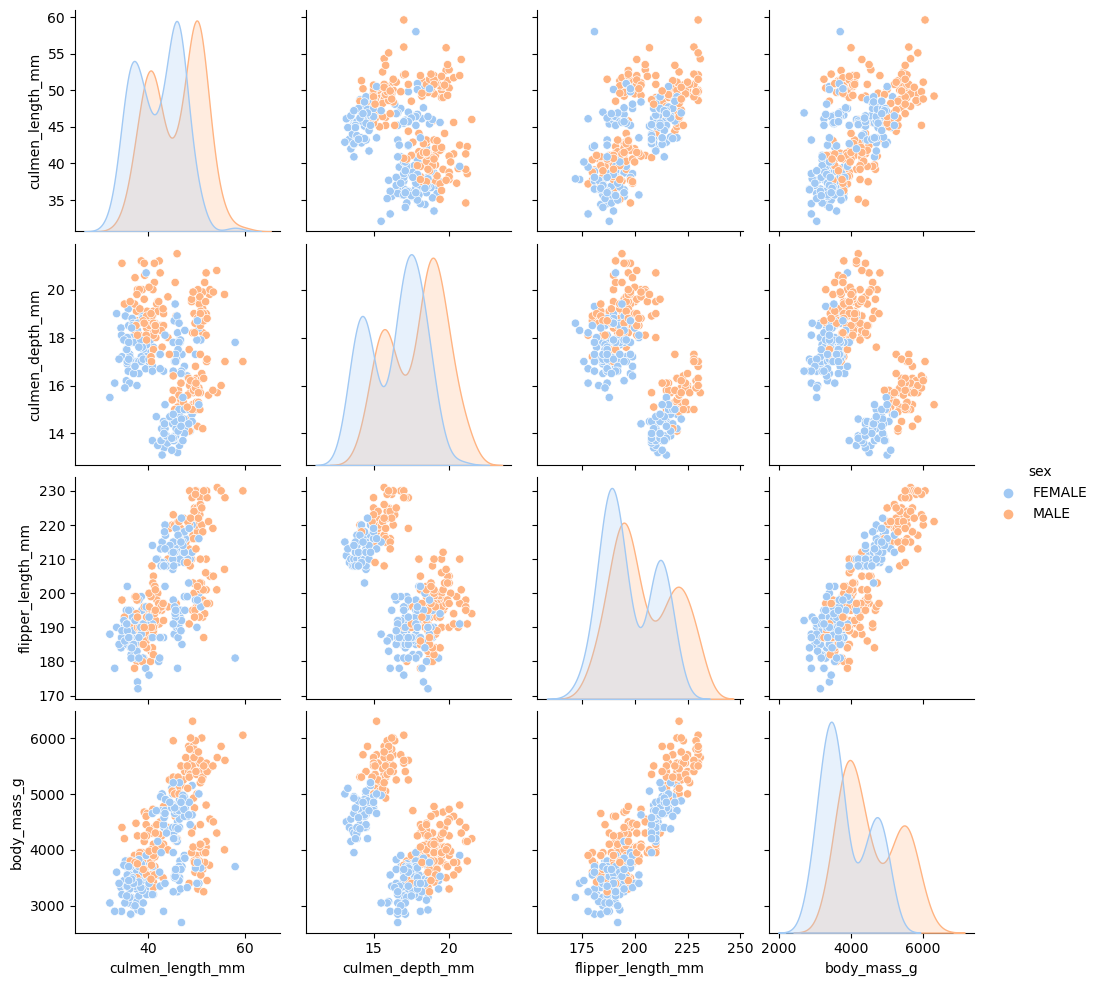

In [38]:
sns.pairplot(cleaned_data, hue='sex')
plt.show()

從上圖可得，雄性企鵝在各項屬性數值方面大於雌性企鵝。